#**CLEAN DATA**

##**Merge raw_data files into one dataframe**

In [1]:
import pandas as pd

raw_data_files = [pd.read_excel('/content/dongho_dana.xlsx'),
                  pd.read_excel('/content/dongho_dangquang2.xlsx'),
                  pd.read_excel('/content/dongho_haitrieu.xlsx'),]

data = pd.concat(raw_data_files, ignore_index=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3047 non-null   int64 
 1   Ma san pham         3045 non-null   object
 2   Gioi tinh           3038 non-null   object
 3   Duong kinh mat      3038 non-null   object
 4   Chat lieu mat kinh  3036 non-null   object
 5   Chat lieu day       2950 non-null   object
 6   Bo may              3045 non-null   object
 7   Chong nuoc          3040 non-null   object
 8   Thuong hieu         3043 non-null   object
 9   Hang                3044 non-null   object
 10  Price               3047 non-null   object
dtypes: int64(1), object(10)
memory usage: 262.0+ KB


##**Missing data**

In [2]:
missing_data_count = data.isnull().sum()
print(missing_data_count)

Unnamed: 0             0
Ma san pham            2
Gioi tinh              9
Duong kinh mat         9
Chat lieu mat kinh    11
Chat lieu day         97
Bo may                 2
Chong nuoc             7
Thuong hieu            4
Hang                   3
Price                  0
dtype: int64


<Axes: >

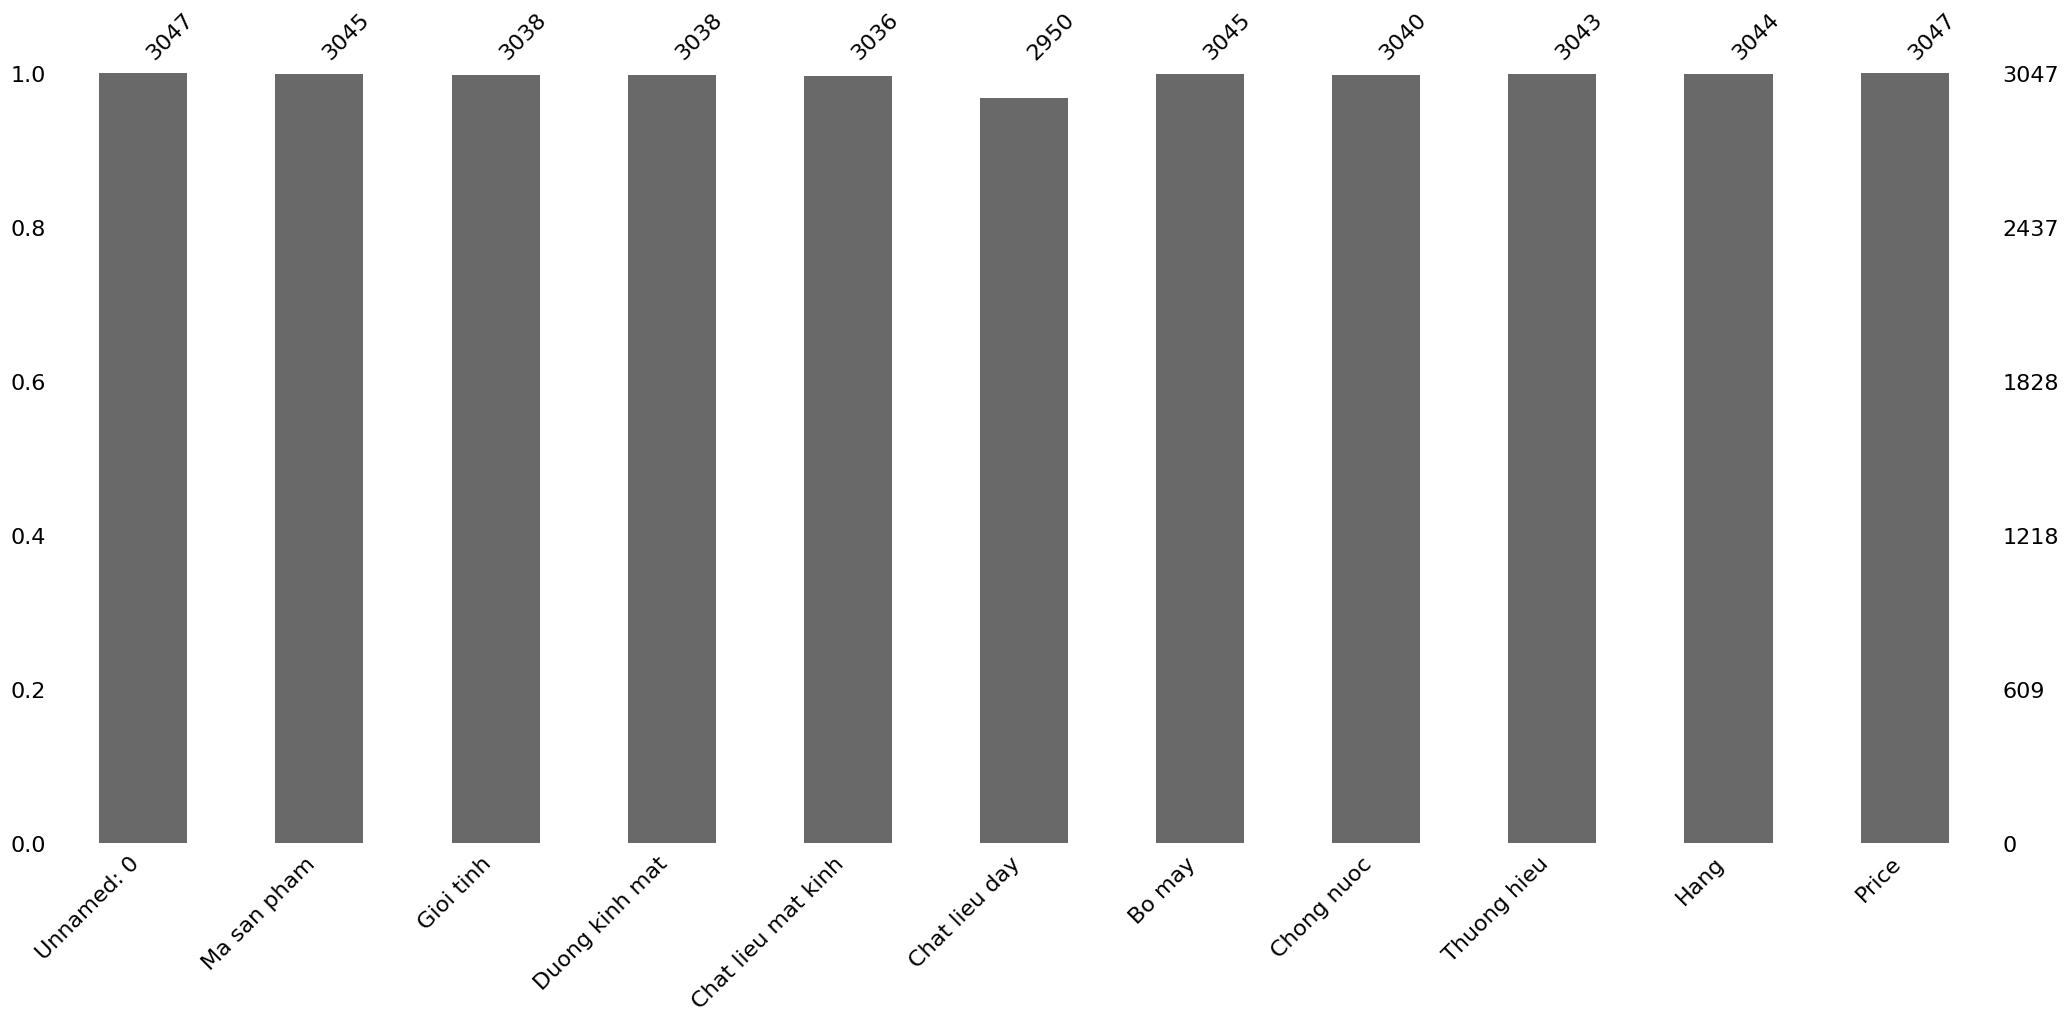

In [ ]:
import missingno as msno

msno.bar(data)

##**Diameter**

In [5]:
data['duong kinh'] = data['Duong kinh mat'].copy() # Creating a copy of RAM
data['duong kinh'].unique()

print(data['duong kinh'])

0        45.4mm
1        45.4mm
2       45.4 mm
3        45.4mm
4       45.4 mm
         ...   
3042       38mm
3043       38mm
3044       38mm
3045       49mm
3046       45mm
Name: duong kinh, Length: 3047, dtype: object


In [6]:
import random
diameter = []
for i in data['duong kinh'] :
  i = str(i).lower().replace(',','.')
  if 'nan' in i :
    random_number = random.uniform(39, 42)
    rounded_number = round(random_number, 1)
    diameter.append(rounded_number)
   
 
  elif 'x'  in i :
    diameter.append(i.split('x')[0].replace('mm',''))

  elif '×' in i :
    diameter.append(i.split('×')[0].replace('mm',''))
   
  else :
    diameter.append(i.replace('mm',''))
    


#**Glass Material**

In [7]:
data['chat lieu mat kinh'] = data['Chat lieu mat kinh'].copy() # Creating a copy of RAM
data['chat lieu mat kinh'].unique()

print(data['chat lieu mat kinh'])

0             khoáng (Mineral Glass)
1             khoáng (Mineral Glass)
2             khoáng (Mineral Glass)
3             khoáng (Mineral Glass)
4             khoáng (Mineral Glass)
                    ...             
3042      Sapphire (Kính Chống Trầy)
3043      Sapphire (Kính Chống Trầy)
3044      Sapphire (Kính Chống Trầy)
3045     Mineral Crystal (Kính Cứng)
3046     Mineral Crystal (Kính Cứng)
Name: chat lieu mat kinh, Length: 3047, dtype: object


In [8]:
Glass_material = []
glass_types =['Mineral Crystal','Sapphire Crystal','Acrylic Crystal','Hardlex Crystal',' Resin Glass']
for i in data['chat lieu mat kinh'] :
  i = str(i).split('(')[0]
  if 'nan' in i :
    random_number = random.randint(0, 4)
    Glass_material.append(glass_types[random_number])
  elif 'khoáng' in i.lower()   :
    Glass_material.append(glass_types[0])
  elif 'mineral' in i.lower() :
    Glass_material.append(glass_types[0])
  elif ('sapphire' in i.lower() ) or (' sappire' in i.lower()) or ('saphire' in i.lower()) :
    Glass_material.append(glass_types[1])
  elif 'nhựa' in i.lower() :
    Glass_material.append(glass_types[4])
  elif ('cứng' in i.lower()) or ( 'kínhcứngchịulực' in i.lower() )  or ('kínhcườnglực' in i.lower()):
    random_number = random.randint(0, 1)
    Glass_material.append(glass_types[random_number])
  elif 'mica' in i.lower() :
    Glass_material.append(glass_types[2])
  elif 'hardenedcrystexcrystal' in i.lower() :
    Glass_material.append('Hardened Crystex Crystal')
  elif 'perspex' in i.lower() :
    Glass_material.append('Perspex')
  else :
    Glass_material.append(i)

In [ ]:
print("kich thuoc :" ,len(Glass_material))

for (j,i) in enumerate(Glass_material) :
   print(j,i)

#**Wire Material**

In [10]:
data['chat lieu day'] = data['Chat lieu day'].copy() # Creating a copy of RAM
data['chat lieu day'].unique()

print(data['chat lieu day'])

0       Dây kim loại (Custom)
1       Dây kim loại (Custom)
2         Dây cao su (Custom)
3                    Dây nhựa
4         Dây cao su (Custom)
                ...          
3042            Thép Không Gỉ
3043            Thép Không Gỉ
3044            Thép Không Gỉ
3045                      NaN
3046                      NaN
Name: chat lieu day, Length: 3047, dtype: object


In [11]:
Wire_material = []
wire_types = ['dây da' ,'thép không gỉ']
for i in data['chat lieu day'] :
  i = str(i).split('(')[0].lower()
  if 'nan' in i :
    random_number = random.randint(0, 1)
    Wire_material.append(wire_types[random_number])
  elif 'dây da' in i :
    Wire_material.append(wire_types[0])
  elif 'nhựa' in i :
    Wire_material.append('dây nhựa')
  elif 'chất liệu vỏ' in i :
    Wire_material.append(i.replace('chất liệu vỏ',''))
  elif 'stainless steel' in i :
    Wire_material.append(wire_types[1])
  else :
    Wire_material.append(i)

In [ ]:
print("kich thuoc :" ,len(Wire_material))

for (j,i) in enumerate(Wire_material) :
   print(j,i)

#**Apparatus**

In [12]:
data['bo may'] = data['Bo may'].copy() # Creating a copy of RAM
data['bo may'].unique()

print(data['bo may'])

0                            Pin (Quartz)
1                            Pin (Quartz)
2                            Pin (Quartz)
3       Tough Solar (Năng lượng mặt trời)
4                            Pin (Quartz)
                      ...                
3042                         Quartz (Pin)
3043                         Quartz (Pin)
3044                         Quartz (Pin)
3045                         Quartz (Pin)
3046                         Quartz (Pin)
Name: bo may, Length: 3047, dtype: object


In [13]:
import random
Apparatus = []
types = ['Quartz' ,'Touch Solar','Automatic']
for i in data['bo may'] :
  i = str(i).split('(')[0]
  if 'nan' in i :
    random_number = random.randint(0, 2)
    Apparatus.append(types[random_number])
  elif ('pin' in i.lower() ) or ('quartz' in i.lower()) :
    Apparatus.append(types[0])
  elif ('lên cót' in i.lower() )  or ('handwinding' in i.lower()):
    Apparatus.append('Hand-Wound')
  elif ('cơ' in i.lower() ) or ('automatic' in i.lower()):
    Apparatus.append(types[2])
  
  elif 'solar' in i.lower() :
    Apparatus.append(types[1])
  else :
    Apparatus.append(i)

In [ ]:
print("kich thuoc :" ,len(Apparatus))

kich thuoc : 3047


#**Waterproof**

In [14]:
data['chong nuoc'] = data['Chong nuoc'].copy() # Creating a copy of RAM
data['chong nuoc'].unique()

print(data['chong nuoc'])

0         20ATM
1         20ATM
2         20ATM
3         20ATM
4         20ATM
         ...   
3042      5 ATM
3043      5 ATM
3044      5 ATM
3045     10 ATM
3046      5 ATM
Name: chong nuoc, Length: 3047, dtype: object


In [15]:
import random
Waterproof = []

for i in data['chong nuoc'] :
  i = str(i).lower()
  if 'nan' in i :
    random_number = random.randint(5, 10)
    Waterproof.append(random_number)
  elif 'bar' in i   :
   Waterproof.append(i.replace('bar',''))
  elif 'atm' in i:
    Waterproof.append(i.replace('atm',''))
  elif 'm' in i :
    Waterproof.append(int(i.replace('m',''))/10)
  

In [ ]:
print("kich thuoc :" ,len(Waterproof))
for i in Waterproof :
  print(i)

#**Origin**

In [16]:
data['thuong hieu'] = data['Thuong hieu'].copy() # Creating a copy of RAM
data['Thuong hieu'].unique()

print(data['thuong hieu'])

0        Nhật Bản
1        Nhật Bản
2        Nhật Bản
3        Nhật Bản
4        Nhật Bản
          ...    
3042     Nhật Bản
3043     Nhật Bản
3044     Nhật Bản
3045     Nhật Bản
3046     Nhật Bản
Name: thuong hieu, Length: 3047, dtype: object


In [17]:
import random
Origin = []
Origin_types = ['Mỹ' ,'Nhật Bản' ,'Thụy sỹ' ,'Áo']
for i in data['thuong hieu'] :
  i = str(i).split('/')[0]
  if 'nan' in i :
    random_number = random.randint(0, 3)
    Origin.append(Origin_types[random_number])
  elif 'lắp ráp' in i.lower()   :
   Origin.append(i.replace('Lắp ráp',''))
  
  else :
    Origin.append(i)

In [ ]:
print("kich thuoc :" ,len(Origin))
for i in Origin :
  print(i)

#**Agency**

In [18]:
data['hang'] = data['Hang'].copy() # Creating a copy of RAM
data['hang'].unique()

print(data['hang'])

0         Casio
1         Casio
2         Casio
3         Casio
4         Casio
         ...   
3042     Orient
3043     Orient
3044     Orient
3045      Casio
3046      Casio
Name: hang, Length: 3047, dtype: object


In [19]:
import random
Agency = []

for i in data['hang'] :
  i = str(i).split('(')[0]
  if 'nan' in i :
    Agency.append('Casio')
  else :
    Agency.append(i)

In [ ]:
print("kich thuoc :" ,len(Agency))
for i in Agency :
  print(i)

#**Price**

In [20]:
data['gia'] = data['Price'].copy() # Creating a copy of RAM
data['gia'].unique()

print(data['gia'])

0           5695200
1           5695200
2           5515200
3           4752000
4           5515200
           ...     
3042    6.330.000 ₫
3043    6.330.000 ₫
3044    6.330.000 ₫
3045    4.984.000 ₫
3046    1.347.000 ₫
Name: gia, Length: 3047, dtype: object


In [21]:
import random
Price = []

for i in data['gia'] :
  i = str(i)
  if 'nan' in i :
    random_number = random.randint(500000, 5000000)
    Price.append(random_number)
  else :
    Price.append(i.replace(".", "").replace("₫", "").replace('đ',''))

In [ ]:
print("kich thuoc :" ,len(Price))
for i in Price :
  print(i)

#**Data Cleaned**

In [22]:
a = {'Duong kinh ':diameter,'Chat lieu mat kinh':Glass_material,'Chat lieu day':Wire_material,'Bo may':Apparatus,'Chong nuoc':Waterproof,'Xuất xứ':Origin,'Hang':Agency , 'Price' :Price}
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()
dataset = pd.DataFrame(data=df)
dataset.head()

,Duong kinh,Chat lieu mat kinh,Chat lieu day,Bo may,Chong nuoc,Xuất xứ,Hang,Price
0,45.4,Mineral Crystal,dây kim loại,Quartz,20,Nhật Bản,Casio,5695200
1,45.4,Mineral Crystal,dây kim loại,Quartz,20,Nhật Bản,Casio,5695200
2,45.4,Mineral Crystal,dây cao su,Quartz,20,Nhật Bản,Casio,5515200
3,45.4,Mineral Crystal,dây nhựa,Touch Solar,20,Nhật Bản,Casio,4752000
4,45.4,Mineral Crystal,dây cao su,Quartz,20,Nhật Bản,Casio,5515200


#**Save to Excel**

In [23]:

dataset.to_excel('data_clean.xlsx')